In [1]:
from analysis.analyze_results import *
from pathlib import Path
import matplotlib

In [2]:
# output_base_folder = Path("/iarai/work/logs/storage_benchmarking")
output_base_folder = Path("/home/ivan/temp/temp-benchmarking")


## Dataloader benchmark -- with batch pool test

**parameters**

| param | range |
| --- | --- |
| batch_pool_size | 2, 4, 8, 16, 32, 64 | 
| num_fetch_workers | 2, 4, 8, 16, 32, 64, 128 | 
| fetch_impl | asyncio, threaded |
| dataset | s3,scratch |


**parameters explained**

| param | implementation | details | 
| --- | --- | --- |
| batch_pool_size | asyncio | Unused |
|  | threaded | Number of batches to fetch in parallel (normally, one batch is fetched, and items are downloaded (sequentially or in parallel). This implementation takes N batches and starts downloading items in parallel. Individual items are yielded and once a full batch is collected it is yielded.)|
| num_fetch_workers | asyncio | ThreadPoolExecutor argument for the maximum number of threads that can be used to execute the given calls. Also, the number of tasks initially placed into the task (worker) queue.  |
|  | threaded | ThreadPoolExecutor argument for the maximum number of threads that can be used to execute the given calls |

In [3]:
group_by_dataloader = ["dataset",  "num_fetch_workers", "num_workers", "batch_pool"]

In [4]:
df_dataloader = extract_pandas(output_base_folder, folder_filter="fetcher_impl_5/*benchmark_dataloader_s3*")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126/126 [00:03<00:00, 31.62it/s]


In [5]:
df_dataloader_zeroworkers_aio=df_dataloader[df_dataloader["num_workers"]==0]
df_dataloader_zeroworkers_aio=df_dataloader_zeroworkers_aio[df_dataloader_zeroworkers_aio["fetch_impl"]=="asyncio"]

In [6]:
print(df_dataloader_zeroworkers_aio.groupby(group_by_dataloader).groups.keys())

dict_keys([('s3', 2, 0, 2), ('s3', 2, 0, 4), ('s3', 2, 0, 8), ('s3', 2, 0, 16), ('s3', 2, 0, 32), ('s3', 2, 0, 64), ('s3', 4, 0, 2), ('s3', 4, 0, 4), ('s3', 4, 0, 8), ('s3', 4, 0, 16), ('s3', 4, 0, 32), ('s3', 4, 0, 64), ('s3', 8, 0, 2), ('s3', 8, 0, 4), ('s3', 8, 0, 8), ('s3', 8, 0, 16), ('s3', 8, 0, 32), ('s3', 8, 0, 64), ('s3', 16, 0, 2), ('s3', 16, 0, 4), ('s3', 16, 0, 8), ('s3', 16, 0, 16), ('s3', 16, 0, 32), ('s3', 16, 0, 64), ('s3', 32, 0, 2), ('s3', 32, 0, 4), ('s3', 32, 0, 8), ('s3', 32, 0, 16), ('s3', 32, 0, 32), ('s3', 32, 0, 64), ('s3', 64, 0, 2), ('s3', 64, 0, 4), ('s3', 64, 0, 8), ('s3', 64, 0, 16), ('s3', 64, 0, 32), ('s3', 64, 0, 64), ('s3', 128, 0, 2), ('s3', 128, 0, 4), ('s3', 128, 0, 8), ('s3', 128, 0, 16), ('s3', 128, 0, 32), ('s3', 128, 0, 64)])


In [7]:
display(get_run_stats(df_dataloader_zeroworkers_aio, group_by=group_by_dataloader))

downloaded data [B]  \
dataset num_fetch_workers num_workers batch_pool run                                                                       
s3      2                 0           2          20210927f111501_benchmark_dataloader_s3_128_0_2...          337392431.0   
                                      4          20210927f112220_benchmark_dataloader_s3_128_0_2...          347301461.0   
                                      8          20210927f112936_benchmark_dataloader_s3_128_0_2...          344081192.0   
                                      16         20210927f113652_benchmark_dataloader_s3_128_0_2...          353409029.0   
                                      32         20210927f114405_benchmark_dataloader_s3_128_0_2...          337419162.0   
                                      64         20210927f115119_benchmark_dataloader_s3_128_0_2...          336112820.0   
        4                 0           2          20210927f115659_benchmark_dataloader_s3_128_0_4...          341344613.0   
                                      4          20210927f120047_benchmark_dataloader_s3_128_0_4...          337249130.0   
                                      8          20210927f120440_benchmark_dataloader_s3_128_0_4...          350729709.0   
                                      16         20210927f120827_benchmark_dataloader_s3_128_0_4...          343723496.0   
                                      32         20210927f121216_benchmark_dataloader_s3_128_0_4...          348457147.0   
                                      64         20210927f121602_benchmark_dataloader_s3_128_0_4...          341238527.0   
        8                 0           2          20210927f121903_benchmark_dataloader_s3_128_0_8...          341553778.0   
                                      4          20210927f122108_benchmark_dataloader_s3_128_0_8...          336021918.0   
                                      8          20210927f122328_benchmark_dataloader_s3_128_0_8...          341625570.0   
                                      16         20210927f122532_benchmark_dataloader_s3_128_0_8...          346074484.0   
                                      32         20210927f122737_benchmark_dataloader_s3_128_0_8...          351086575.0   
                                      64         20210927f122942_benchmark_dataloader_s3_128_0_8...          332600909.0   
        16                0           2          20210927f123130_benchmark_dataloader_s3_128_0_1...          341589376.0   
                                      4          20210927f123253_benchmark_dataloader_s3_128_0_1...          343664825.0   
                                      8          20210927f123420_benchmark_dataloader_s3_128_0_1...          362878678.0   
                                      16         20210927f123548_benchmark_dataloader_s3_128_0_1...          333440894.0   
                                      32         20210927f123716_benchmark_dataloader_s3_128_0_1...          346868458.0   
                                      64         20210927f123844_benchmark_dataloader_s3_128_0_1...          359380344.0   
        32                0           2          20210927f124016_benchmark_dataloader_s3_128_0_3...          352565707.0   
                                      4          20210927f124146_benchmark_dataloader_s3_128_0_3...          352289793.0   
                                      8          20210927f124322_benchmark_dataloader_s3_128_0_3...          336026216.0   
                                      16         20210927f124458_benchmark_dataloader_s3_128_0_3...          339655716.0   
                                      32         20210927f124620_benchmark_dataloader_s3_128_0_3...          332827491.0   
                                      64         20210927f124749_benchmark_dataloader_s3_128_0_3...          342633952.0   
        64                0           2          20210927f124922_benchmark_dataloader_s3_128_0_6...          354043571.0   
         

In [8]:
display(get_thread_stats(df_dataloader_zeroworkers_aio,group_by=group_by_dataloader))

,time_start_thread,time_end_thread,total_elapsed_thread,dataset,num_fetch_workers,num_workers,batch_pool,elapsed_thread,elapsed_processing
threading_ident,,,,,,,,,
139613062551296,1.632741e+09,1.632741e+09,38.600866,s3,128,0,32,56.428107,0.684072
139613070944000,1.632741e+09,1.632741e+09,39.367376,s3,128,0,32,57.158695,0.688738
139613079336704,1.632741e+09,1.632741e+09,40.374284,s3,128,0,32,56.818693,0.710581
139613565851392,1.632741e+09,1.632741e+09,38.127644,s3,128,0,32,56.316484,0.677025
139613574244096,1.632741e+09,1.632741e+09,42.440383,s3,128,0,32,57.431674,0.738972
...,...,...,...,...,...,...,...,...,...
140670975710976,1.632740e+09,1.632740e+09,30.040835,s3,64,0,16,45.567858,0.659255
140681430320896,1.632738e+09,1.632738e+09,117.463224,s3,4,0,32,119.948007,0.979285
140681438713600,1.632738e+09,1.632738e+09,118.494779,s3,4,0,32,119.964556,0.987748


### Event plots of dataloading

Let's visualize the timeline of dataloading, a new color for each thread (cycle 8)

In [9]:
df_dataloader_zeroworkers_aio[(df_dataloader_zeroworkers_aio["num_fetch_workers"]==2) & (df_dataloader_zeroworkers_aio["batch_pool"]==4)]["run"].iloc[0]


'20210927f112220_benchmark_dataloader_s3_128_0_2_sync'

In [10]:
# rate_matrix = np.ndarray(shape=(6,7), dtype=float, order='F')
rate_matrix_asyncio = pd.DataFrame(columns=["x", "y", "rate"])

for i, batch_pool_size in enumerate([2, 4, 8, 16, 32, 64]):
    for j, num_fetch_workers in enumerate([2, 4, 8, 16, 32, 64, 128]):
        print(f"Batch pool size: {num_fetch_workers}, {batch_pool_size}")
        run = df_dataloader_zeroworkers_aio[(df_dataloader_zeroworkers_aio["num_fetch_workers"]==num_fetch_workers) & (df_dataloader_zeroworkers_aio["batch_pool"]==batch_pool_size)]["run"].iloc[0]
        mbps, mbitps = plot_events_timeline(df_dataloader_zeroworkers_aio[df_dataloader_zeroworkers_aio["run"]==run], summary_only=True)
        r = float(list(mbitps)[0].replace("MB", ""))
        rate_matrix_asyncio = rate_matrix_asyncio.append({'x': batch_pool_size, 'y': num_fetch_workers, 'rate': r}, ignore_index=True)
#         rate_matrix[i][j] = float(list(mbps)[0].replace("MB", ""))
print(rate_matrix_asyncio)

Batch pool size: 2, 2
total_elapsed=0:04:01.877478
total_bytes=337.4 MB
overall rate {'1.4 MB'}/s
overall rate {'11.2 MB'}it/s
Batch pool size: 4, 2
total_elapsed=0:02:00.133929
total_bytes=341.3 MB
overall rate {'2.8 MB'}/s
overall rate {'22.7 MB'}it/s
Batch pool size: 8, 2
total_elapsed=0:01:04.291563
total_bytes=341.6 MB
overall rate {'5.3 MB'}/s
overall rate {'42.5 MB'}it/s
Batch pool size: 16, 2
total_elapsed=0:00:40.359640
total_bytes=341.6 MB
overall rate {'8.5 MB'}/s
overall rate {'67.7 MB'}it/s
Batch pool size: 32, 2
total_elapsed=0:00:41.302288
total_bytes=352.6 MB
overall rate {'8.5 MB'}/s
overall rate {'68.3 MB'}it/s
Batch pool size: 64, 2
total_elapsed=0:00:46.480745
total_bytes=354.0 MB
overall rate {'7.6 MB'}/s
overall rate {'60.9 MB'}it/s
Batch pool size: 128, 2
total_elapsed=0:00:58.643691
total_bytes=343.2 MB
overall rate {'5.9 MB'}/s
overall rate {'46.8 MB'}it/s
Batch pool size: 2, 4
total_elapsed=0:03:57.493772
total_bytes=347.3 MB
overall rate {'1.5 MB'}/s
overall 

In [11]:
df_dataloader_zeroworkers_th=df_dataloader[df_dataloader["num_workers"]==0]
df_dataloader_zeroworkers_th=df_dataloader_zeroworkers_th[df_dataloader_zeroworkers_th["fetch_impl"]=="threaded"]

In [12]:
display(get_run_stats(df_dataloader_zeroworkers_th, group_by=group_by_dataloader))

downloaded data [B]  \
dataset num_fetch_workers num_workers batch_pool run                                                                       
s3      2                 0           2          20210927f111146_benchmark_dataloader_s3_128_0_2...          679592750.0   
                                      4          20210927f111906_benchmark_dataloader_s3_128_0_2...          679083432.0   
                                      8          20210927f112620_benchmark_dataloader_s3_128_0_2...          679083432.0   
                                      16         20210927f113338_benchmark_dataloader_s3_128_0_2...          679083432.0   
                                      32         20210927f114052_benchmark_dataloader_s3_128_0_2...          679083432.0   
                                      64         20210927f114803_benchmark_dataloader_s3_128_0_2...          679083432.0   
        4                 0           2          20210927f115516_benchmark_dataloader_s3_128_0_4...          693855250.0   
                                      4          20210927f115902_benchmark_dataloader_s3_128_0_4...          693855250.0   
                                      8          20210927f120250_benchmark_dataloader_s3_128_0_4...          690049964.0   
                                      16         20210927f120643_benchmark_dataloader_s3_128_0_4...          693855250.0   
                                      32         20210927f121029_benchmark_dataloader_s3_128_0_4...          693855250.0   
                                      64         20210927f121418_benchmark_dataloader_s3_128_0_4...          693855250.0   
        8                 0           2          20210927f121805_benchmark_dataloader_s3_128_0_8...          693855250.0   
                                      4          20210927f122010_benchmark_dataloader_s3_128_0_8...          693855250.0   
                                      8          20210927f122229_benchmark_dataloader_s3_128_0_8...          693855250.0   
                                      16         20210927f122434_benchmark_dataloader_s3_128_0_8...          693855250.0   
                                      32         20210927f122638_benchmark_dataloader_s3_128_0_8...          693855250.0   
                                      64         20210927f122843_benchmark_dataloader_s3_128_0_8...          693855250.0   
        16                0           2          20210927f123048_benchmark_dataloader_s3_128_0_1...          693855250.0   
                                      4          20210927f123213_benchmark_dataloader_s3_128_0_1...          693855250.0   
                                      8          20210927f123338_benchmark_dataloader_s3_128_0_1...          693855250.0   
                                      16         20210927f123504_benchmark_dataloader_s3_128_0_1...          693855250.0   
                                      32         20210927f123633_benchmark_dataloader_s3_128_0_1...          693855250.0   
                                      64         20210927f123800_benchmark_dataloader_s3_128_0_1...          693855250.0   
        32                0           2          20210927f123929_benchmark_dataloader_s3_128_0_3...          693855250.0   
                                      4          20210927f124059_benchmark_dataloader_s3_128_0_3...          693855250.0   
                                      8          20210927f124229_benchmark_dataloader_s3_128_0_3...          693855250.0   
                                      16         20210927f124410_benchmark_dataloader_s3_128_0_3...          693855250.0   
                                      32         20210927f124537_benchmark_dataloader_s3_128_0_3...          693855250.0   
                                      64         20210927f124702_benchmark_dataloader_s3_128_0_3...          693855250.0   
        64                0           2          20210927f124832_benchmark_dataloader_s3_128_0_6...          693855250.0   
         

In [13]:
# rate_matrix = np.ndarray(shape=(6,7), dtype=float, order='F')
rate_matrix_threaded = pd.DataFrame(columns=["x", "y", "rate"])

for i, batch_pool_size in enumerate([2, 4, 8, 16, 32, 64]):
    for j, num_fetch_workers in enumerate([2, 4, 8, 16, 32, 64, 128]):
        print(f"Batch pool size: {num_fetch_workers}, {batch_pool_size}")
        run = df_dataloader_zeroworkers_th[(df_dataloader_zeroworkers_th["num_fetch_workers"]==num_fetch_workers) & (df_dataloader_zeroworkers_th["batch_pool"]==batch_pool_size)]["run"].iloc[0]
        mbps, mbitps = plot_events_timeline(df_dataloader_zeroworkers_th[df_dataloader_zeroworkers_th["run"]==run], summary_only=True)
        if list(mbitps)[0] != "0 Bytes":
            r = float(list(mbitps)[0].replace("MB", ""))
            rate_matrix_threaded = rate_matrix_threaded.append({'x': batch_pool_size, 'y': num_fetch_workers, 'rate': r}, ignore_index=True)
#         rate_matrix[i][j] = float(list(mbps)[0].replace("MB", ""))
print(rate_matrix_threaded)

Batch pool size: 2, 2
total_elapsed=0:03:12.342901
total_bytes=679.6 MB
overall rate {'3.5 MB'}/s
overall rate {'28.3 MB'}it/s
Batch pool size: 4, 2
total_elapsed=0:01:40.820240
total_bytes=693.9 MB
overall rate {'6.9 MB'}/s
overall rate {'55.1 MB'}it/s
Batch pool size: 8, 2
total_elapsed=0:00:55.494436
total_bytes=693.9 MB
overall rate {'12.5 MB'}/s
overall rate {'100.0 MB'}it/s
Batch pool size: 16, 2
total_elapsed=0:00:39.554137
total_bytes=693.9 MB
overall rate {'17.5 MB'}/s
overall rate {'140.3 MB'}it/s
Batch pool size: 32, 2
total_elapsed=0:00:42.812987
total_bytes=693.9 MB
overall rate {'16.2 MB'}/s
overall rate {'129.7 MB'}it/s
Batch pool size: 64, 2
total_elapsed=0:00:47.079563
total_bytes=693.9 MB
overall rate {'14.7 MB'}/s
overall rate {'117.9 MB'}it/s
Batch pool size: 128, 2
total_elapsed=0:00:58.568181
total_bytes=693.9 MB
overall rate {'11.8 MB'}/s
overall rate {'94.8 MB'}it/s
Batch pool size: 2, 4
total_elapsed=0:03:11.192951
total_bytes=679.1 MB
overall rate {'3.6 MB'}/s

In [14]:
# rate_matrix_asyncio["rate"] = rate_matrix_asyncio["rate"]# * 10
# rate_matrix_threaded["rate"] = rate_matrix_threaded["rate"]# * 10

### Comparison - asyncio vs. threaded

*Bubble plot* 
 - x-axis, batch_pool_size (2, 4, 8, 16, 32, 64)
 - y-axis, num_fetch_workers (2, 4, 8, 16, 32, 64, 128)
 - dot-size, rate in mbit/s

Text(0.5, 1.0, 'Threaded [green] vs Asyncio [blue]')

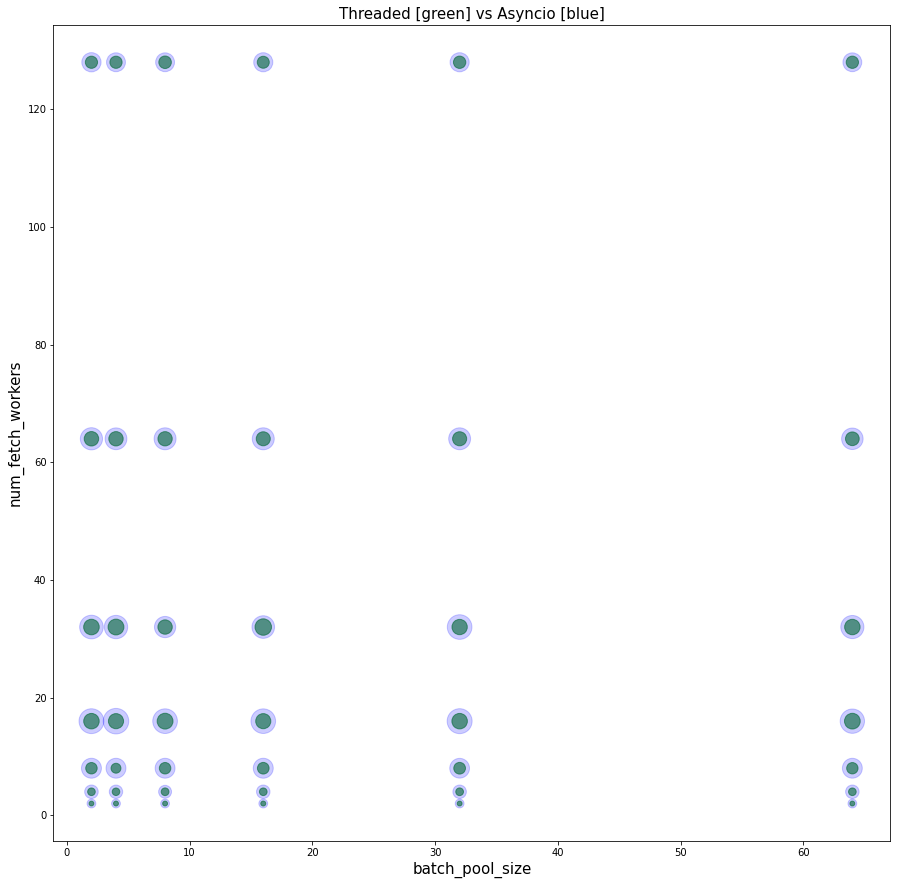

In [15]:
plt.rcParams["figure.figsize"] = (15,15)
ax = plt.gca()
ax.scatter(rate_matrix_asyncio.x, rate_matrix_asyncio.y, s=rate_matrix_asyncio.rate**1.3,
             alpha=0.6, 
             c="green",
             marker='o')
ax.scatter(rate_matrix_threaded.x, rate_matrix_threaded.y, s=rate_matrix_threaded.rate**1.3,
             alpha=0.2, 
             c="blue",
             marker='o')
plt.xlabel("batch_pool_size", size=15)
plt.ylabel("num_fetch_workers", size=15)
plt.title("Threaded [green] vs Asyncio [blue]", size=15)

In [16]:
both = pd.concat([rate_matrix_asyncio, rate_matrix_threaded["rate"]], ignore_index = True, axis = 1)
both['diff'] = both.apply(lambda row: float(row[3] - row[2]) , axis = 1)
both.columns = ['x', 'y', 'asyncio', 'threaded', 'diff']
both["diff"] = both["diff"].clip(lower=0)
# both

Bubble plot shows 3 dimensions, however it's hard to visualize the difference between two approaches, therefore the following bar-plots show each dimension batch_pool_size and num_fetch_workers separately, while the y-axis shows the rate in Mbit/s.

Since it doesn't have any effect for asyncio, those should be roughly the same. However, we can observe that for threaded implementation we have the similar result (Does this mean we don't have a problem with batch-collection order? (e.g. batch 3 is not collected before batch 2))

Text(0.5, 1.0, 'Threaded [red] vs asyncio [blue]')

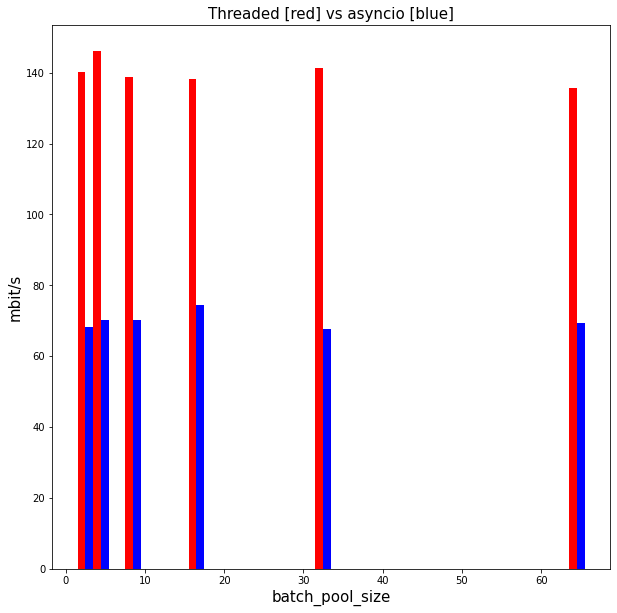

In [17]:
plt.rcParams["figure.figsize"] = (10,10)
ax = plt.subplot(111)
ax.bar(x=list(both.x), height=list(both.threaded), width=1, color="red")
ax.bar(x=list(both.x+1), height=list(both.asyncio), width=1, color="blue")
plt.xlabel("batch_pool_size", size=15)
plt.ylabel("mbit/s", size=15)
plt.title("Threaded [red] vs asyncio [blue]", size=15)

Text(0.5, 1.0, 'Threaded [red] vs asyncio [blue]')

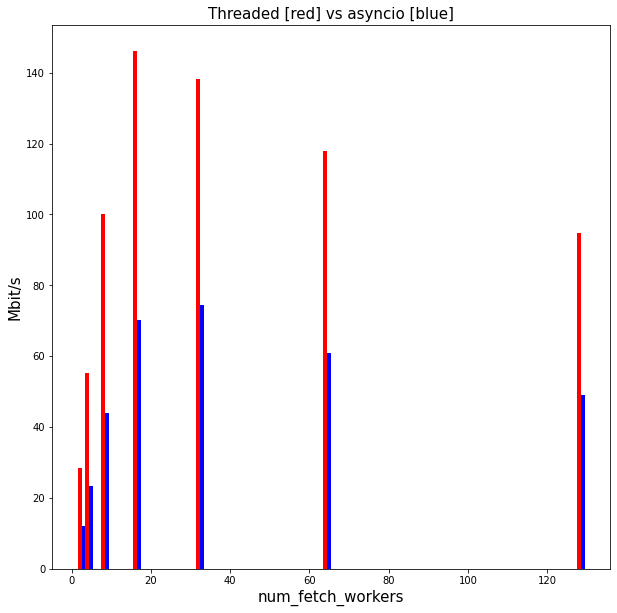

In [18]:
plt.rcParams["figure.figsize"] = (10,10)
ax = plt.subplot(111)
ax.bar(x=list(both.y), height=list(both.threaded), width=1, color="red")
ax.bar(x=list(both.y+1), height=list(both.asyncio), width=1, color="blue")
plt.xlabel("num_fetch_workers", size=15)
plt.ylabel("Mbit/s", size=15)
plt.title("Threaded [red] vs asyncio [blue]", size=15)

In [19]:
both.sort_values(by=['threaded'], ascending=False)
# x = batch_pool_size, y = num_fetch_workers

,x,y,asyncio,threaded,diff
10,4.0,16.0,65.4,146.2,80.8
31,32.0,16.0,67.8,141.3,73.5
3,2.0,16.0,67.7,140.3,72.6
17,8.0,16.0,70.1,138.8,68.7
32,32.0,32.0,66.5,138.4,71.9
24,16.0,16.0,65.2,138.3,73.1
38,64.0,16.0,69.3,135.8,66.5
4,2.0,32.0,68.3,129.7,61.4
11,4.0,32.0,70.1,127.3,57.2
39,64.0,32.0,67.4,125.5,58.1


### Threaded best run 

5376
Lines num: 5453


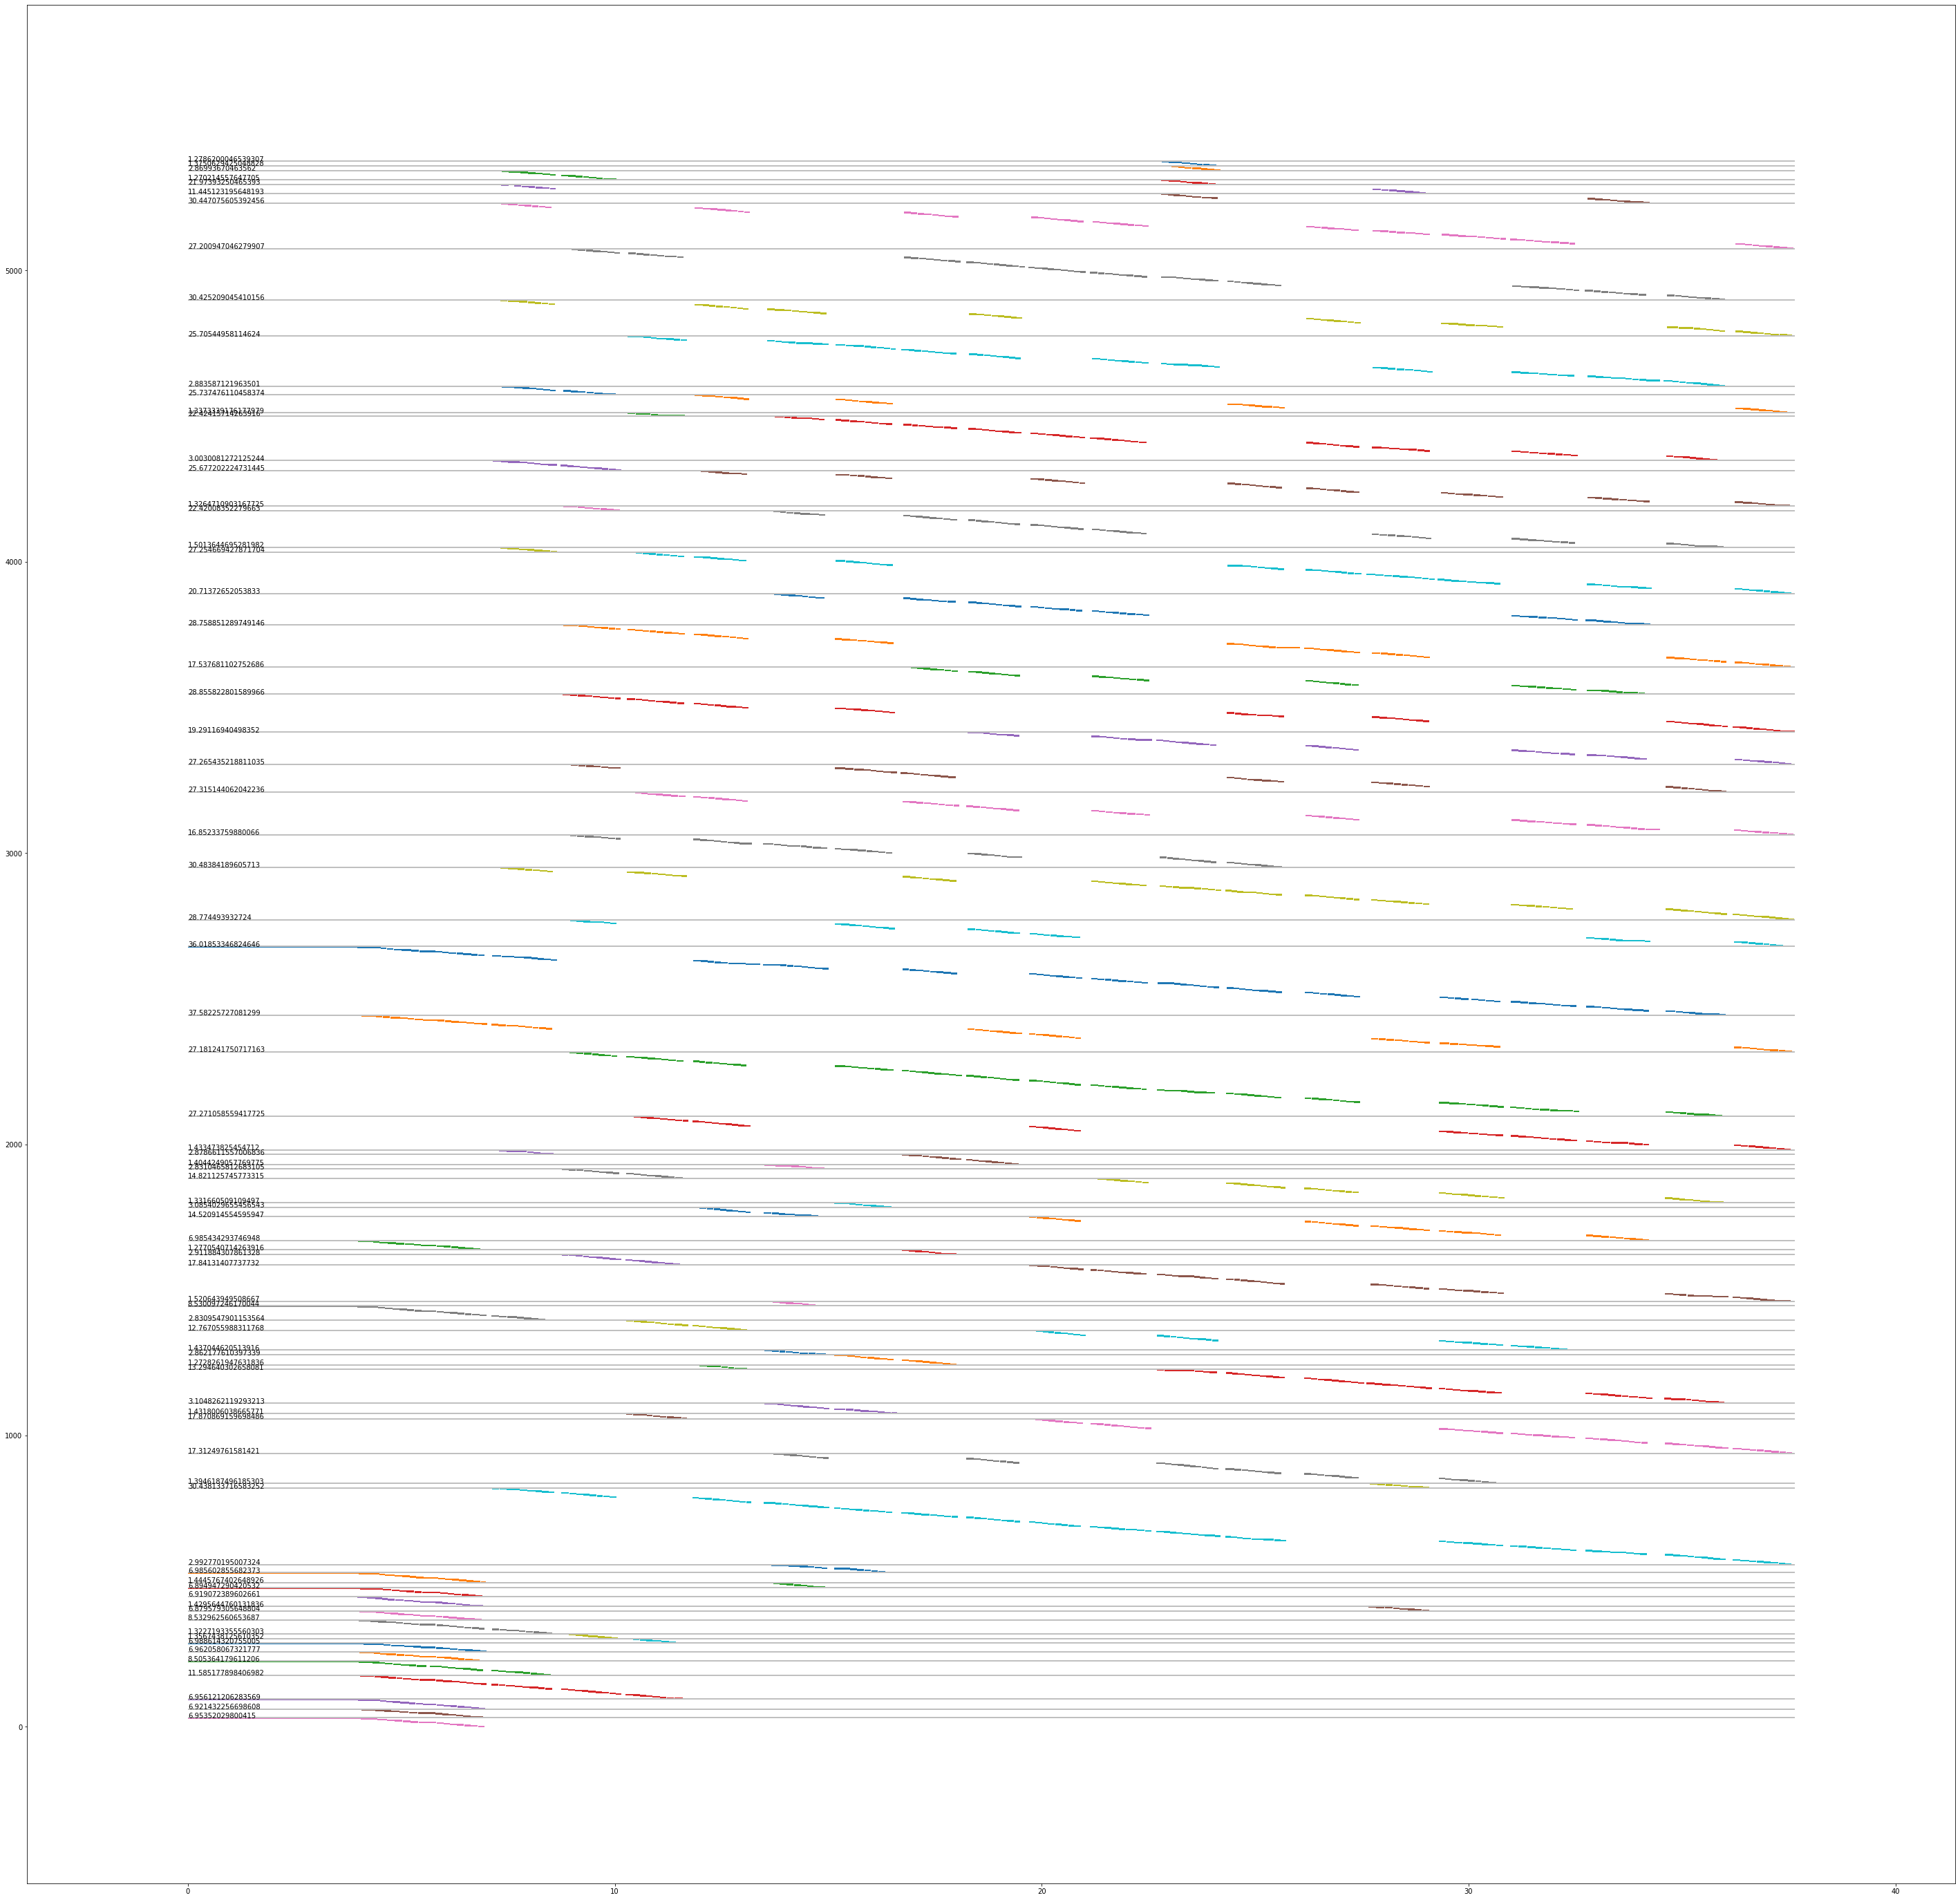

In [20]:
# for i, batch_pool_size in enumerate([2, 4, 8, 16, 32, 64]):
#     for j, num_fetch_workers in enumerate([2, 4, 8, 16, 32, 64, 128]):
run = df_dataloader_zeroworkers_th[(df_dataloader_zeroworkers_th["num_fetch_workers"]==16) & (df_dataloader_zeroworkers_th["batch_pool"]==4)]["run"].iloc[0]
# plot_events_timeline(df_dataloader_zeroworkers_th[df_dataloader_zeroworkers_th["run"]==run], summary_only=False)
plot_events_timeline_detailed(df_dataloader_zeroworkers_th[df_dataloader_zeroworkers_th["run"]==run], filter_function="__getitem__")


### Threaded worst run 

5260
Lines num: 5267


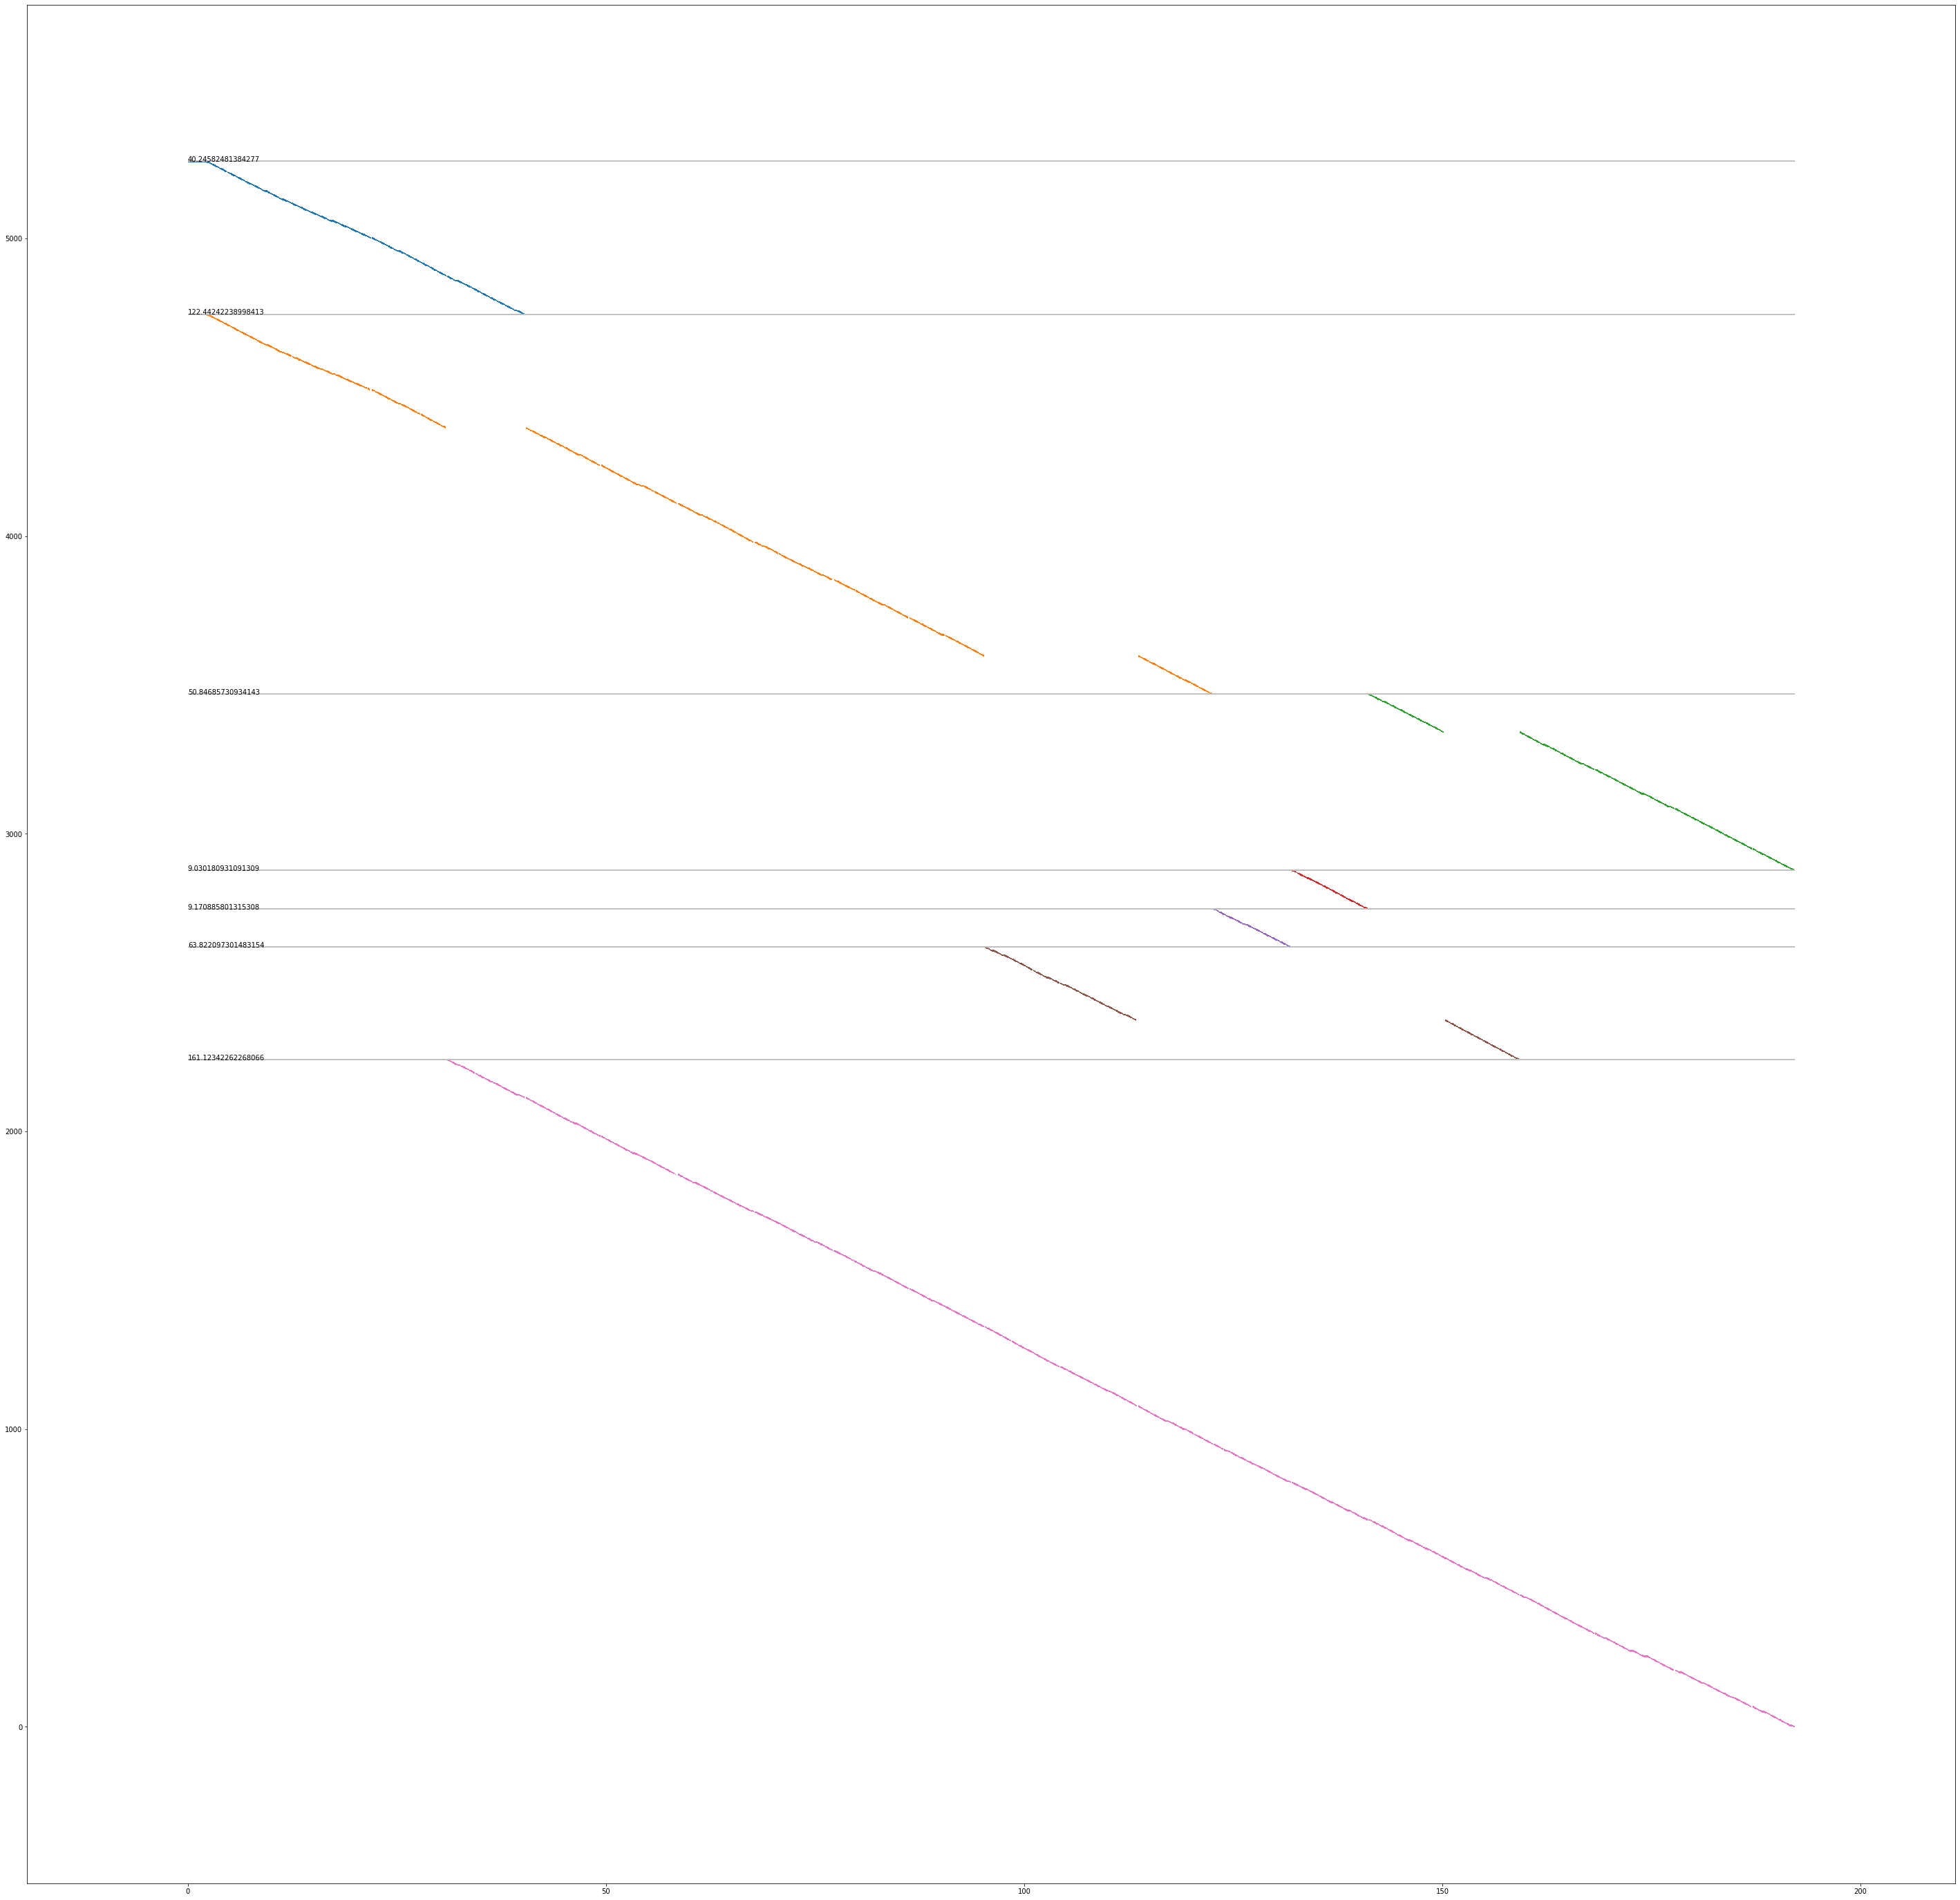

In [21]:
run = df_dataloader_zeroworkers_th[(df_dataloader_zeroworkers_th["num_fetch_workers"]==2) & (df_dataloader_zeroworkers_th["batch_pool"]==8)]["run"].iloc[0]
# plot_events_timeline(df_dataloader_zeroworkers_th[df_dataloader_zeroworkers_th["run"]==run], summary_only=False)
plot_events_timeline_detailed(df_dataloader_zeroworkers_th[df_dataloader_zeroworkers_th["run"]==run], filter_function="__getitem__")

### Asyncio best run 

2560
Lines num: 2592


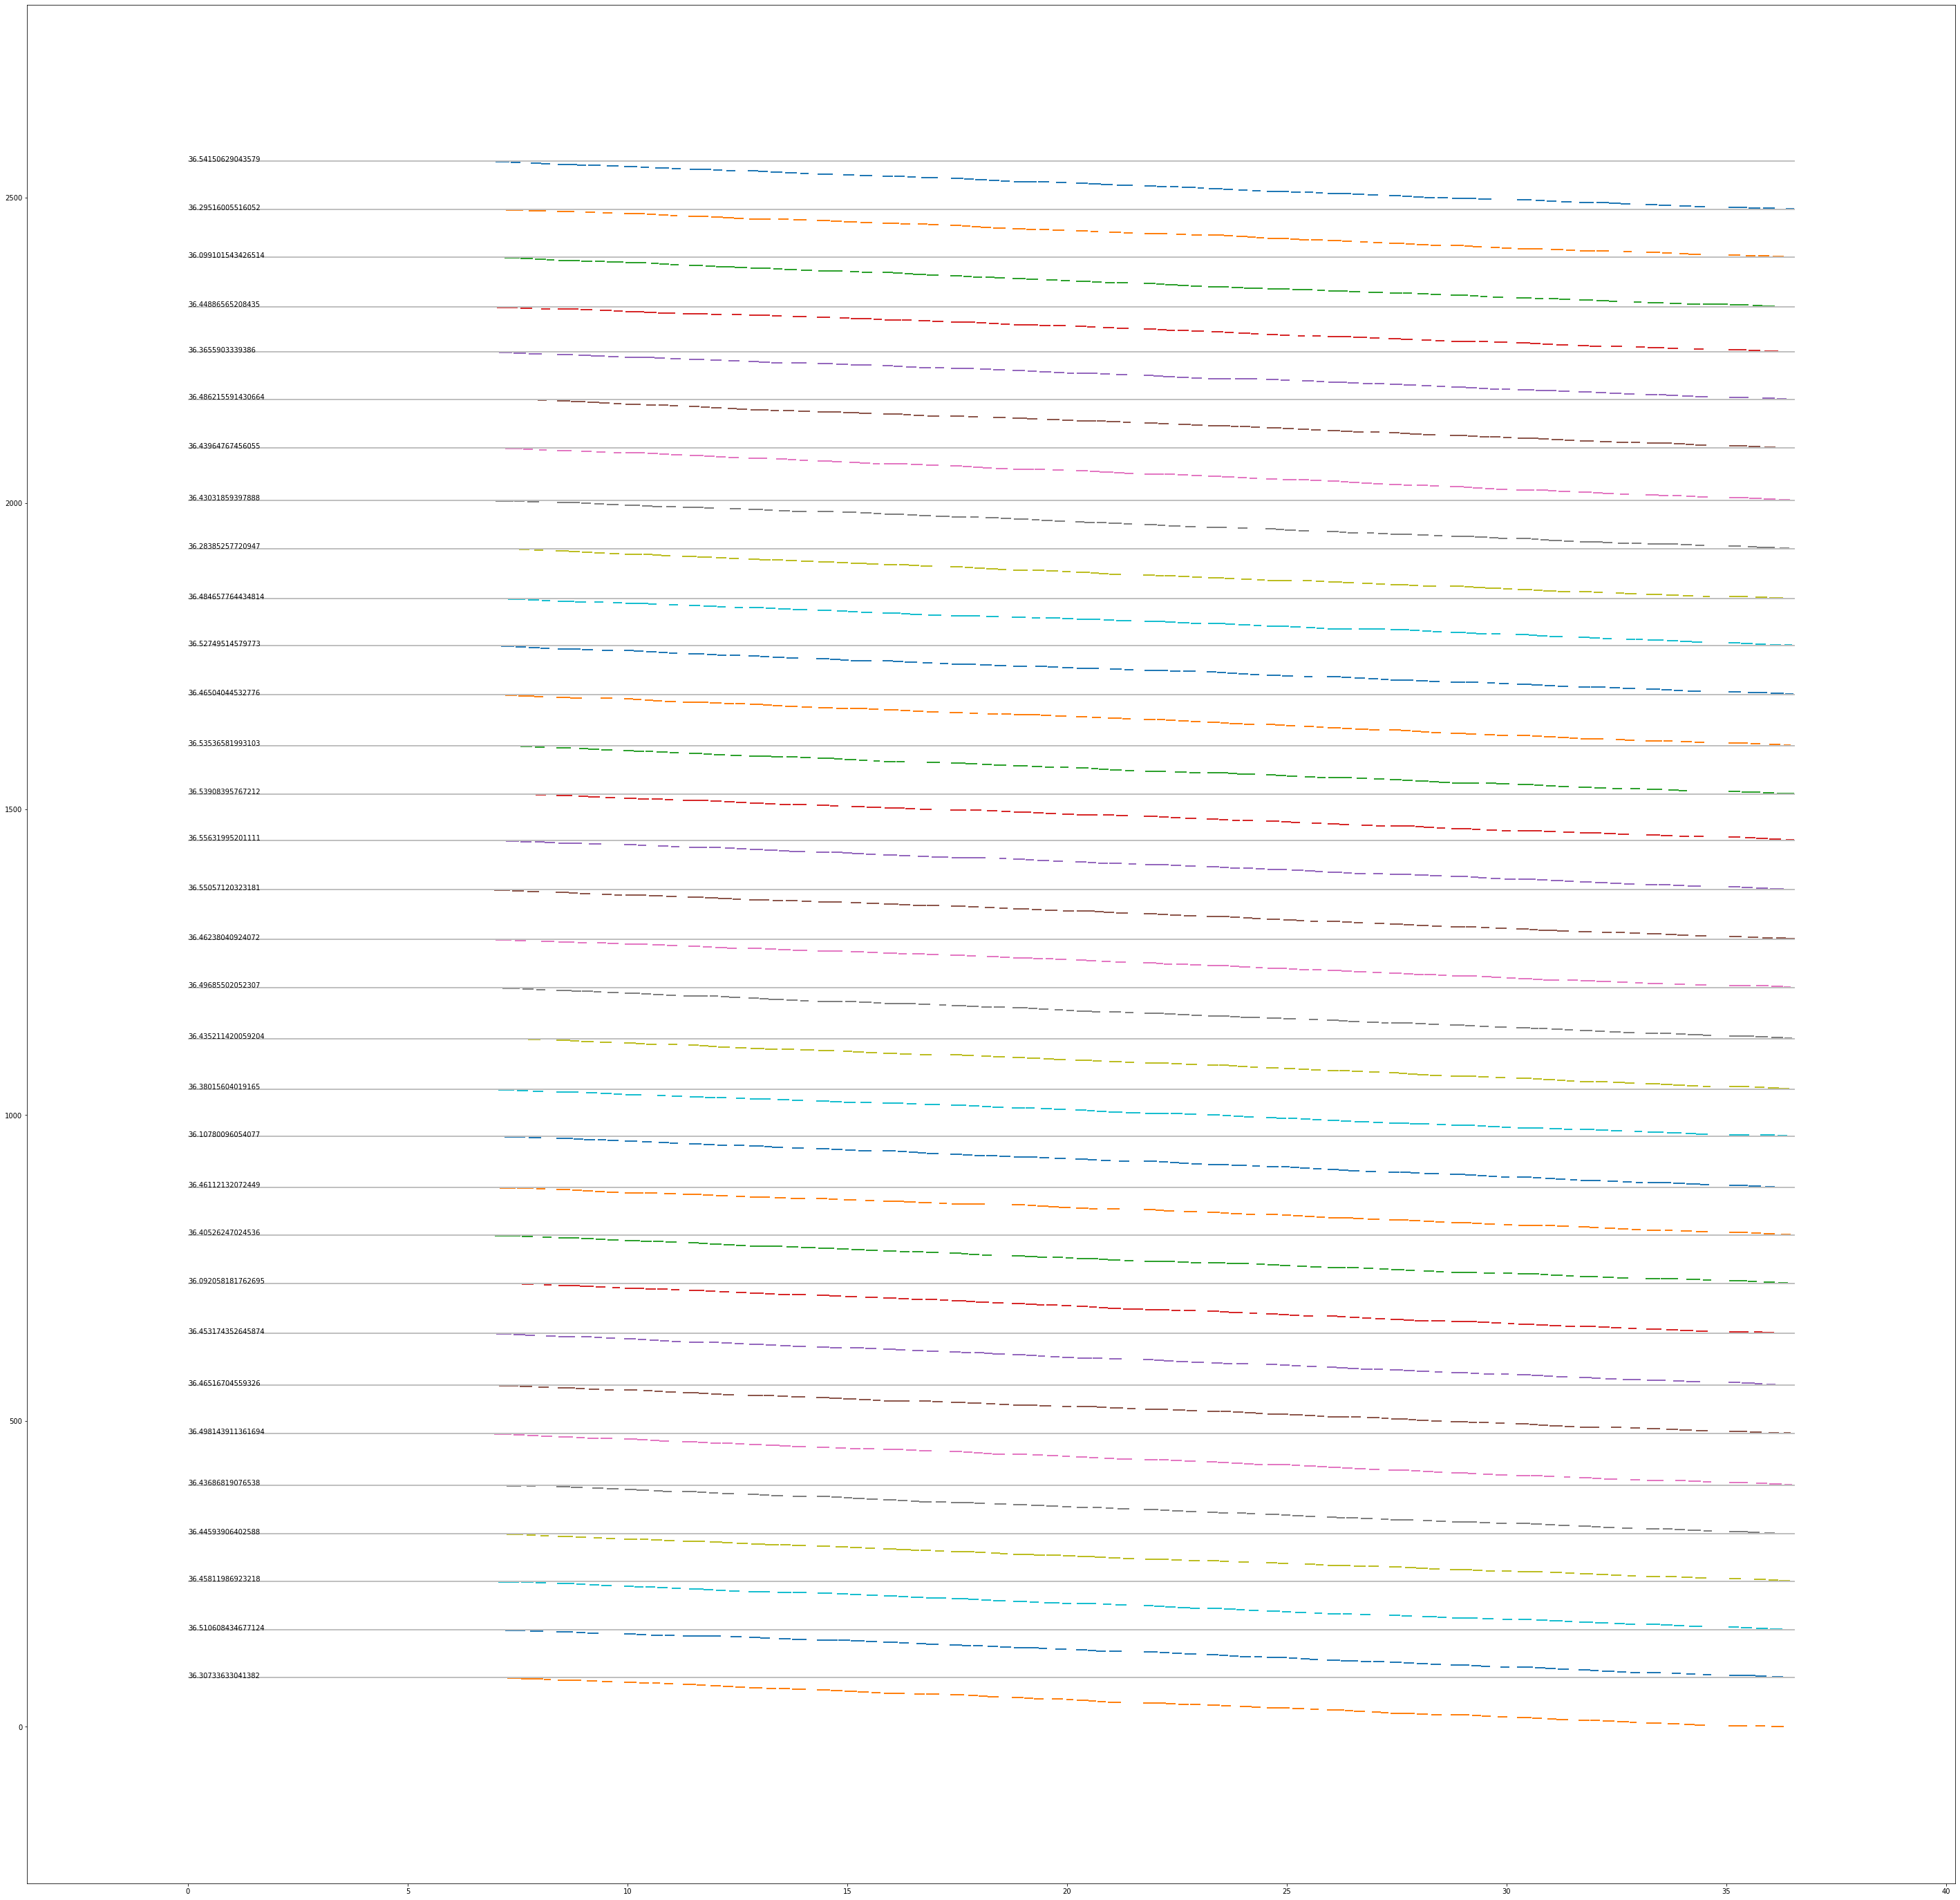

In [22]:
# for i, batch_pool_size in enumerate([2, 4, 8, 16, 32, 64]):
#     for j, num_fetch_workers in enumerate([2, 4, 8, 16, 32, 64, 128]):
run = df_dataloader_zeroworkers_aio[(df_dataloader_zeroworkers_aio["num_fetch_workers"]==32) & (df_dataloader_zeroworkers_aio["batch_pool"]==16)]["run"].iloc[0]
# plot_events_timeline(df_dataloader_zeroworkers_aio[df_dataloader_zeroworkers_aio["run"]==run], summary_only=False)
plot_events_timeline_detailed(df_dataloader_zeroworkers_aio[df_dataloader_zeroworkers_aio["run"]==run], filter_function="__getitem__")

### Asyncio worst run

2560
Lines num: 2562


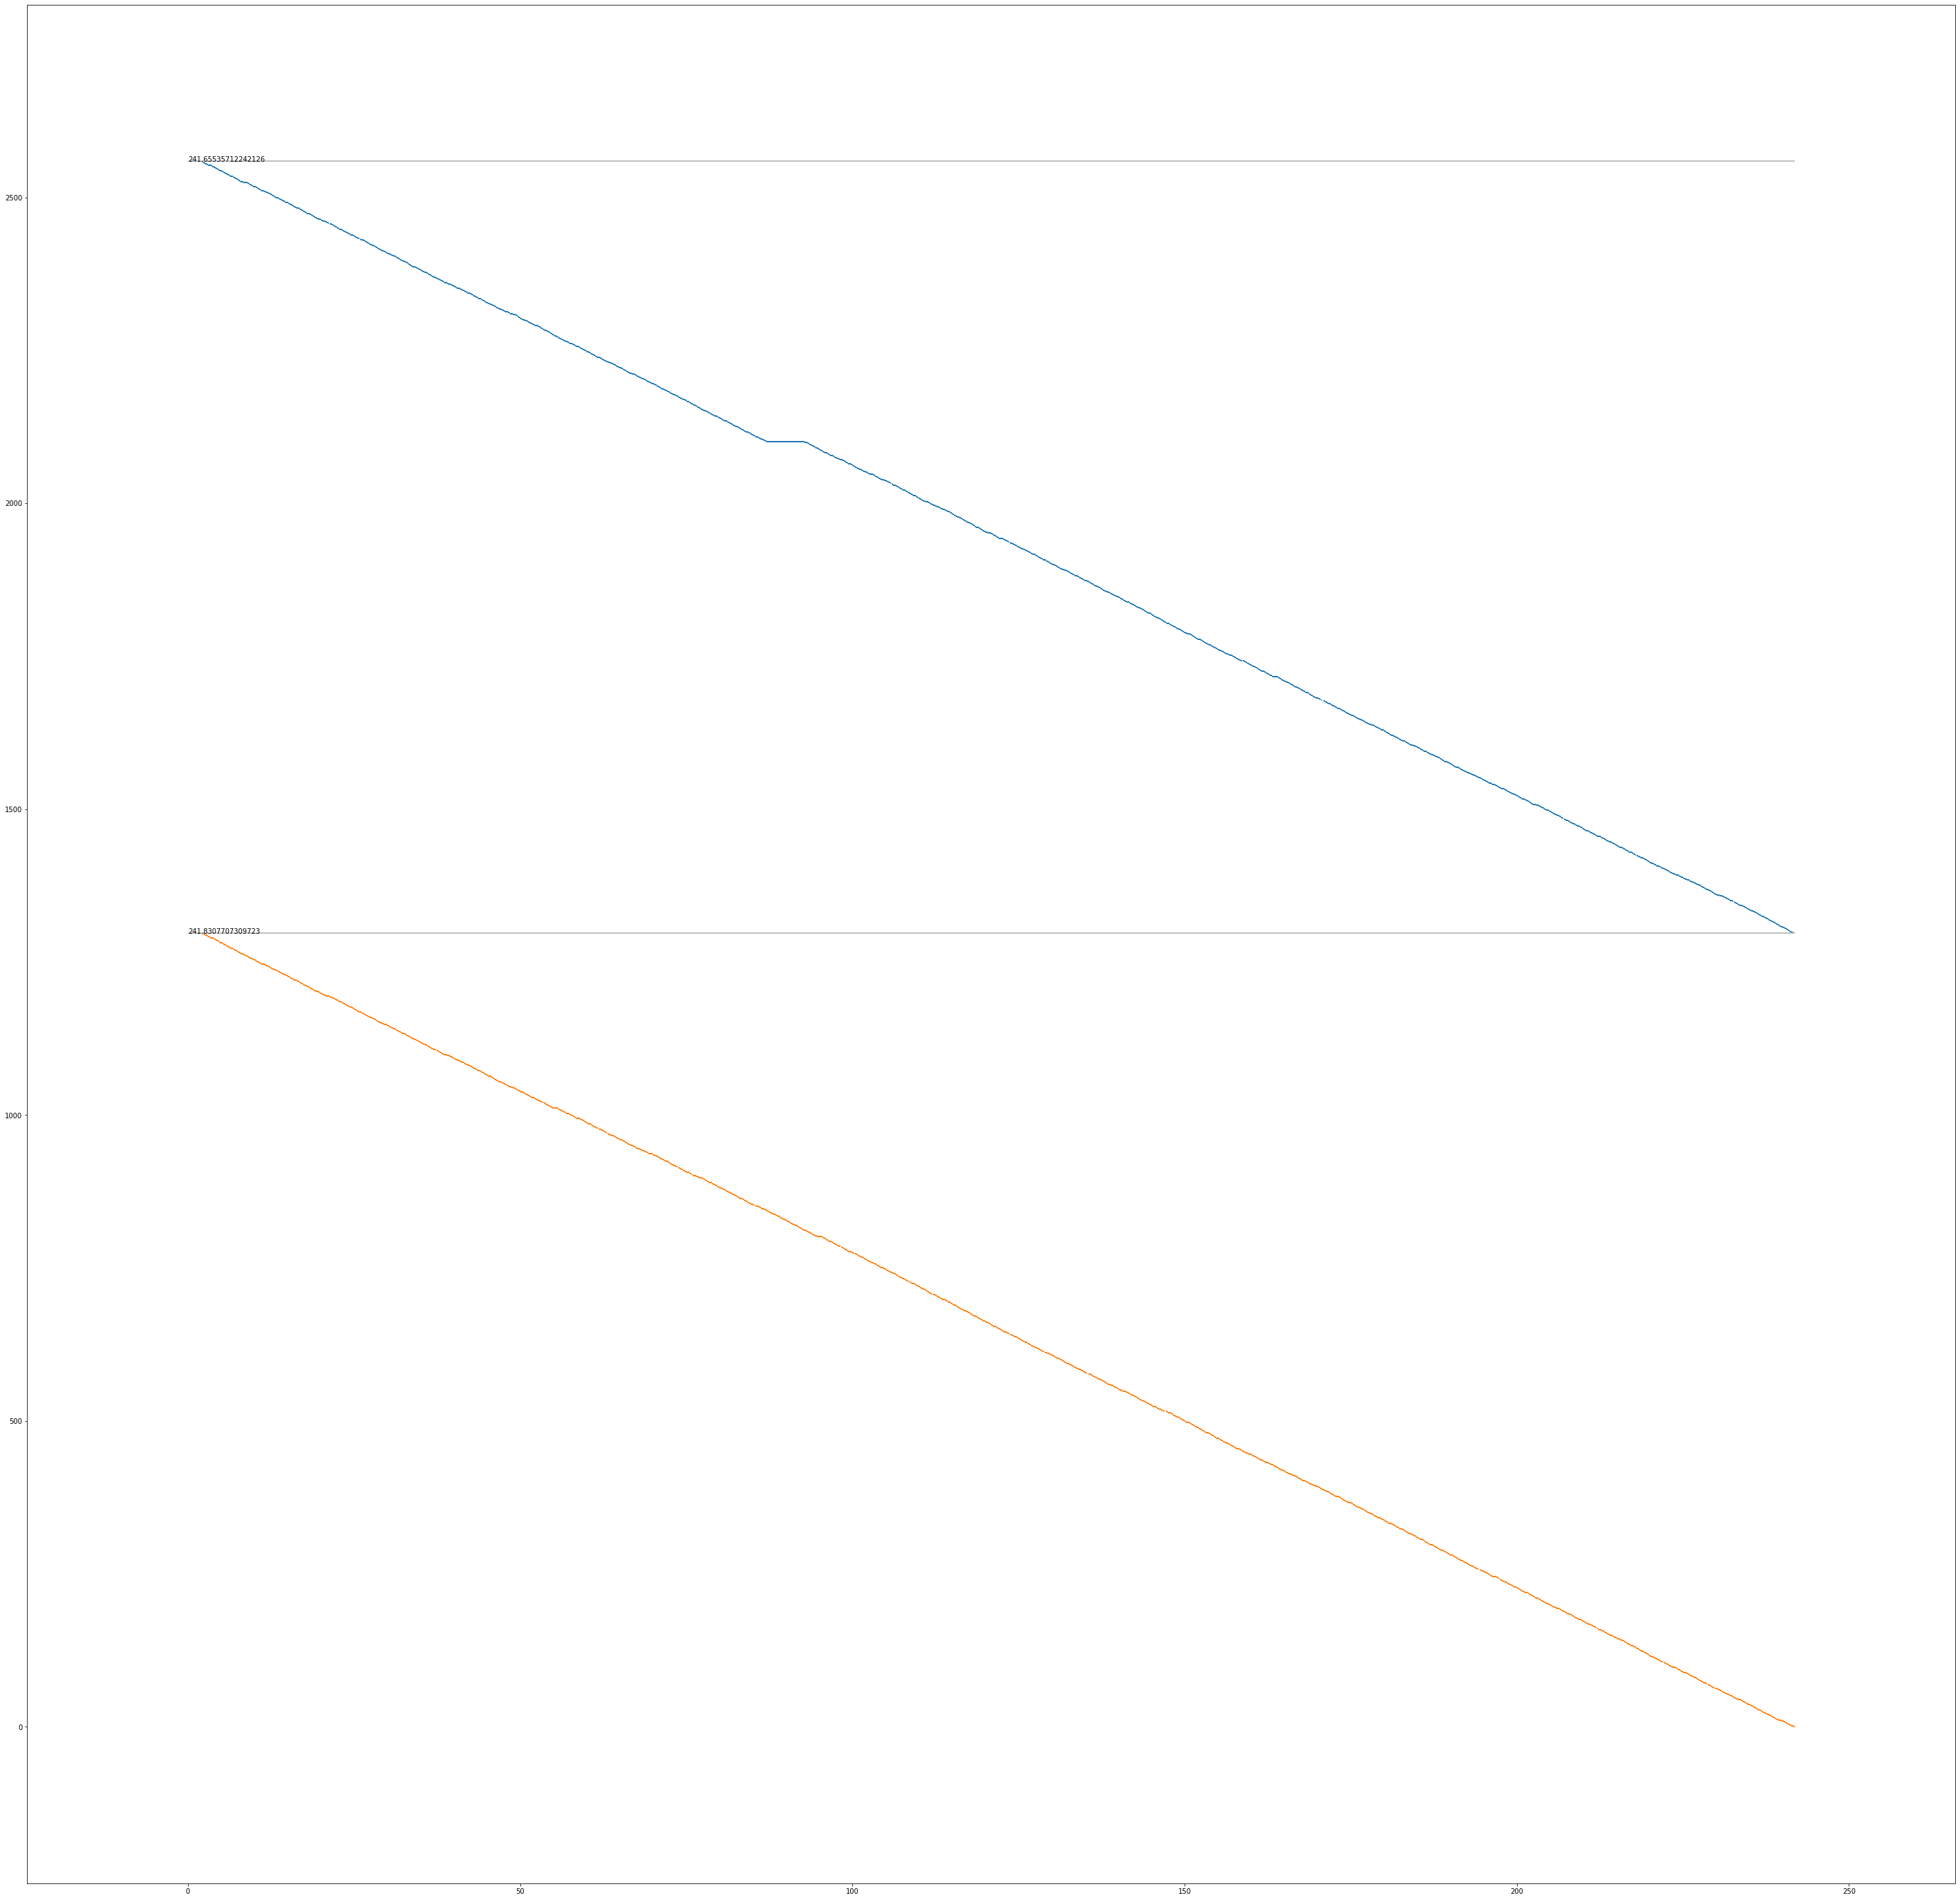

In [23]:
run = df_dataloader_zeroworkers_aio[(df_dataloader_zeroworkers_aio["num_fetch_workers"]==2) & (df_dataloader_zeroworkers_aio["batch_pool"]==2)]["run"].iloc[0]
# plot_events_timeline(df_dataloader_zeroworkers_aio[df_dataloader_zeroworkers_aio["run"]==run], summary_only=False)
plot_events_timeline_detailed(df_dataloader_zeroworkers_aio[df_dataloader_zeroworkers_aio["run"]==run], filter_function="__getitem__")